In [9]:
# importing relevant packages

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords


import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

from sklearn.feature_extraction.text import CountVectorizer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [28]:
# reading data
df_2022 = pd.read_csv('../output/2022_sentiment.csv')
df_2018 = pd.read_csv('../output/2018_sentiment.csv')
df_2020 = pd.read_csv('../output/2020_sentiment.csv')

nat_disas = pd.read_csv("../data/disasters.csv")

df_2022


,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,sent_scores,compound_scores
0,0,Lauren Boebert,@laurenboebert,2022-01-17T23:32:38.000Z,Lauren Boebert\n@laurenboebert\n·\nJan 18,The only solution Ive ever heard the Left prop...,NaN,"1,683","2,259",11.7K,[],https://twitter.com/laurenboebert/status/14832...,"{'neg': 0.078, 'neu': 0.75, 'pos': 0.172, 'com...",0.5279
1,1,Catherine,@catherine___c,2022-01-17T22:54:02.000Z,Catherine\n@catherine___c\n·\nJan 17,Climate change doesnt cause volcanic eruptions...,NaN,158,64,762,[],https://twitter.com/catherine___c/status/14832...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2,king Keith,@KaConfessor,2022-01-17T23:51:41.000Z,king Keith\n@KaConfessor\n·\nJan 18,Vaccinated tennis ball boy collapses in the te...,NaN,24,118,159,['https://pbs.twimg.com/ext_tw_video_thumb/148...,https://twitter.com/KaConfessor/status/1483225...,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...",-0.2960
3,3,PETRIFIED CLIMATE PARENT,@climate_parent,2022-01-17T21:42:04.000Z,PETRIFIED CLIMATE PARENT\n@climate_parent\n·\n...,North America has experienced an average winte...,NaN,15,50,158,[],https://twitter.com/climate_parent/status/1483...,"{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.2924
4,4,Thomas Speight,@Thomas_Sp8,2022-01-17T21:10:40.000Z,Thomas Speight\n@Thomas_Sp8\n·\nJan 17,Theyre gonna do the same with Climate Change w...,🅾,4,24,127,['https://pbs.twimg.com/profile_images/1544171...,https://twitter.com/Thomas_Sp8/status/14831850...,"{'neg': 0.117, 'neu': 0.834, 'pos': 0.049, 'co...",-0.4939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,9045,Dr Srijana Mitra Das,@srijanapiya17,2022-07-18T12:08:28.000Z,Dr Srijana Mitra Das\n@srijanapiya17\n·\nJul 18,ClimateChange is now the greatest story on Ear...,NaN,2,16,24,['https://pbs.twimg.com/profile_images/5140754...,https://twitter.com/srijanapiya17/status/15490...,"{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compou...",0.6369
9046,9046,1%_Better_Every_Day,@jh336405,2022-07-18T00:33:20.000Z,1%_Better_Every_Day\n@jh336405\n·\nJul 18,Replying to \njh\n acuna_r\n and others\nAnd ...,💯 💯 🌏,4,NaN,NaN,['https://pbs.twimg.com/profile_images/1442412...,https://twitter.com/jh336405/status/1548828230...,"{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'comp...",0.4391
9047,9047,David Schechter,@DavidSchechter,2022-07-18T21:13:13.000Z,David Schechter\n@DavidSchechter\n·\nJul 18,While Texans are being asked to use less elect...,NaN,3,14,23,['https://pbs.twimg.com/card_img/1549138950475...,https://twitter.com/DavidSchechter/status/1549...,"{'neg': 0.12, 'neu': 0.839, 'pos': 0.041, 'com...",-0.5106
9048,9048,Daily Climate,@TheDailyClimate,2022-07-18T10:15:09.000Z,Daily Climate\n@TheDailyClimate\n·\nJul 18,Sea levels are rising and communities are scra...,NaN,NaN,3,NaN,['https://pbs.twimg.com/card_img/1547862999808...,https://twitter.com/TheDailyClimate/status/154...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


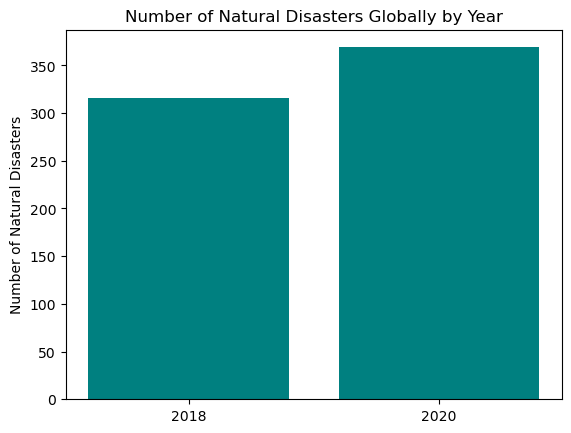

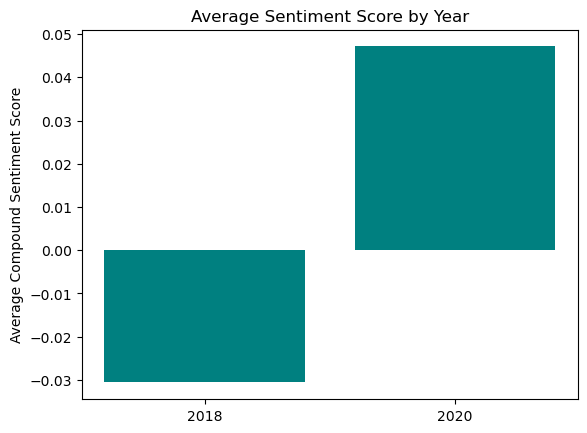

In [31]:
nat_disas["year"] = nat_disas["start_date"].str[:4]
nat_disas_2018 = (nat_disas[nat_disas["year"] == "2018"])
nat_disas_2020 = (nat_disas[nat_disas["year"] == "2020"])

num_nat_disas_2018 = nat_disas_2018.shape[0]
num_nat_disas_2018
num_nat_disas_2020 = nat_disas_2020.shape[0]
num_nat_disas_2020

avg_compound_2018 = df_2018.loc[:, "compound_scores"].mean()
avg_compound_2020 = df_2020.loc[:, "compound_scores"].mean()


plt.bar(["2018", "2020"], [num_nat_disas_2018, num_nat_disas_2020], color = "teal")
plt.ylabel("Number of Natural Disasters")
plt.title("Number of Natural Disasters Globally by Year")
plt.show()

#barwidth = 0.5
#br1 = np.arange(len(["2018", "2020"]))
#br2 = [x + barwidth for x in br1]

#fig, ax1 = plt.subplots()
#color = 'tab:red'
#ax1.set_ylabel('Number of Natural Disasters', color=color)
#ax1.bar(["2018", "2020"], [num_nat_disas_2018, num_nat_disas_2020], color=color, position = 0)
#ax1.tick_params(axis='y', labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('Average Sentiment Score', color=color)  # we already handled the x-label with ax1
#ax2.bar(["2018", "2020"], [avg_compound_2018, avg_compound_2020], color=color, position = 1)
#ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show()

plt.bar(["2018", "2020"], [avg_compound_2018, avg_compound_2020], color = "teal")
plt.ylabel("Average Compound Sentiment Score")
plt.title("Average Sentiment Score by Year")
plt.show()



-0.030584461689006217
0.047139141414141425
-0.019610309392265192


In [ ]:

porter = SnowballStemmer("english")

## your code defining a text processing function
def processing(text_ex):
    tokens = word_tokenize(text_ex.lower()) # lowercase

    #filtered_tokens = [word for word in tokens if word not in custom_doj_stopwords] # gets rid of stopwords

    example_listing_preprocess = [porter.stem(token) 
                            for token in tokens 
                            if token.isalpha() and 
                            len(token) >= 4]
    
    final_list = [" ".join(example_listing_preprocess)]


    return final_list

df_2018["processed_text"] = [processing(text) for text in df_2018["Embedded text"]]


In [ ]:
# your code here

tokenized_docs = [doc[0].split() for doc in doj_subset_wscore["processed_text"]]

dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

lda_model = gensim.models.LdaModel(
    corpus = corpus,
    id2word = dictionary,
    num_topics = 3,
    random_state = 122,
)

lda_model.show_topics(num_words = 15)
